# 3.2 어떤 떡볶이가 맛있을까?

## 3.2.1 데이터 불러오기 : 쇼핑몰 데이터

In [1]:
import pandas as pd
import numpy as np
import re
import os 

from ast import literal_eval
from collections import Counter
from kiwipiepy import Kiwi

import matplotlib.pyplot as plt

%matplotlib inline
plt.rc('font', family='Malgun Gothic')

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')

filepath = './data'
df = pd.read_excel(filepath+"/떡볶이_해시태그.xlsx")
print("데이터 크기", df.shape)
df.head(3)


데이터 크기 (118, 9)


,name,tag,likes,num_review,num_photo,url,int_likes,int_photo,int_review
0,제품1,[],"찜457,590",78,(33건),https://cr.shopping.naver.com/adcr.nhn?x=xOdqd...,457590,33,78
1,제품10,[],"찜1,286",86,(36건),https://cr.shopping.naver.com/adcr.nhn?x=Ghq%2...,1286,36,86
2,제품100,"['#즐기는', '#가용비', '#곱창떡볶이', '#떡볶이', '#곱창', '#간편...","찜12,550","1,262",(489건),https://cr.shopping.naver.com/adcr.nhn?x=KFUyA...,12550,489,1262


## 3.2.2 데이터 전처리: 가중치 구하기

In [ ]:
likes_rank = df['int_likes'].rank(method='dense')

photo_rank = df['int_photo'].rank(method='dense')

review_rank = df['int_review'].rank(method='dense')

df['Rank'] = likes_rank + photo_rank + review_rank

df.sort_values(by='Rank', ascending=False, inplace=True)
display(df.head(4))
display(df.tail(4))

,name,tag,likes,num_review,num_photo,url,int_likes,int_photo,int_review,Rank
14,제품111,[],"찜888,458","3,282","(1,743건)",https://cr.shopping.naver.com/adcr.nhn?x=3qAfU...,888458,1743,3282,241.0
13,제품110,[],"찜888,476","3,092","(1,596건)",https://cr.shopping.naver.com/adcr.nhn?x=IbFuI...,888476,1596,3092,240.0
5,제품103,[],"찜888,548","1,639","(1,103건)",https://cr.shopping.naver.com/adcr.nhn?x=xFmZS...,888548,1103,1639,233.0
18,제품115,"['#홈파티음식', '#어린이간식', '#집들이음식', '#생일음식', '#까르보나...","찜100,482","9,366","(3,123건)",https://cr.shopping.naver.com/adcr.nhn?x=mphl6...,100482,3123,9366,227.0


,name,tag,likes,num_review,num_photo,url,int_likes,int_photo,int_review,Rank
12,제품11,"['#아이들간식', '#떡볶이떡', '#간편조리', '#야식', '#매콤한', '#...","찜8,558",87,(28건),https://cr.shopping.naver.com/adcr.nhn?x=lJGHa...,8558,28,87,32.0
24,제품13,"['#매운떡볶이', '#쫀득한', '#맛있는떡', '#냠냠맛있는', '#간단식사',...","찜4,300",89,(45건),https://cr.shopping.naver.com/adcr.nhn?x=dAL4W...,4300,45,89,32.0
52,제품4,[],"찜8,173",81,(23건),https://cr.shopping.naver.com/adcr.nhn?x=%2B%2...,8173,23,81,23.0
1,제품10,[],"찜1,286",86,(36건),https://cr.shopping.naver.com/adcr.nhn?x=Ghq%2...,1286,36,86,20.0


In [3]:
df['qcut'] = pd.qcut(df['Rank'], q=5, labels = [1,2,3,4,5])
df['qcut'] = df['qcut'].astype('int')

display(df.head(2))
display(df.tail(2))

,name,tag,likes,num_review,num_photo,url,int_likes,int_photo,int_review,Rank,qcut
14,제품111,[],"찜888,458","3,282","(1,743건)",https://cr.shopping.naver.com/adcr.nhn?x=3qAfU...,888458,1743,3282,241.0,5
13,제품110,[],"찜888,476","3,092","(1,596건)",https://cr.shopping.naver.com/adcr.nhn?x=IbFuI...,888476,1596,3092,240.0,5


,name,tag,likes,num_review,num_photo,url,int_likes,int_photo,int_review,Rank,qcut
52,제품4,[],"찜8,173",81,(23건),https://cr.shopping.naver.com/adcr.nhn?x=%2B%2...,8173,23,81,23.0,1
1,제품10,[],"찜1,286",86,(36건),https://cr.shopping.naver.com/adcr.nhn?x=Ghq%2...,1286,36,86,20.0,1


In [4]:
tag_list = []
for i in range(len(df['tag'])):
    tmp = literal_eval(df['tag'][i])
    tmp_weight = tmp * df['qcut'][i]
    tag_list.append(tmp_weight)

## 3.2.3 데이터 분석 : 자주 등장하는 떡볶이 해시태그 찾기

In [5]:
from collections import Counter

df['tag_weight'] = tag_list
tags_weight = sum(tag_list, [])
count_result = Counter(tags_weight).most_common()

keys = []
counts = []
for i in range(len(count_result)):
    key = count_result[i][0]
    cnt = count_result[i][1]

    keys.append(key)
    counts.append(cnt)

df_tag_count = pd.DataFrame({"해시태그" : keys, "빈도" : counts})
df_tag_count[:50]

,해시태그,빈도
0,#떡볶이,71
1,#밀키트,43
2,#국물떡볶이,42
3,#떡볶이소스,40
4,#즉석떡볶이,39
5,#밀떡볶이,36
6,#캠핑요리,31
7,#떡볶이떡,31
8,#매운떡볶이,28
9,#떡볶이양념,22


Text(0.5, 0, '등장 빈도')

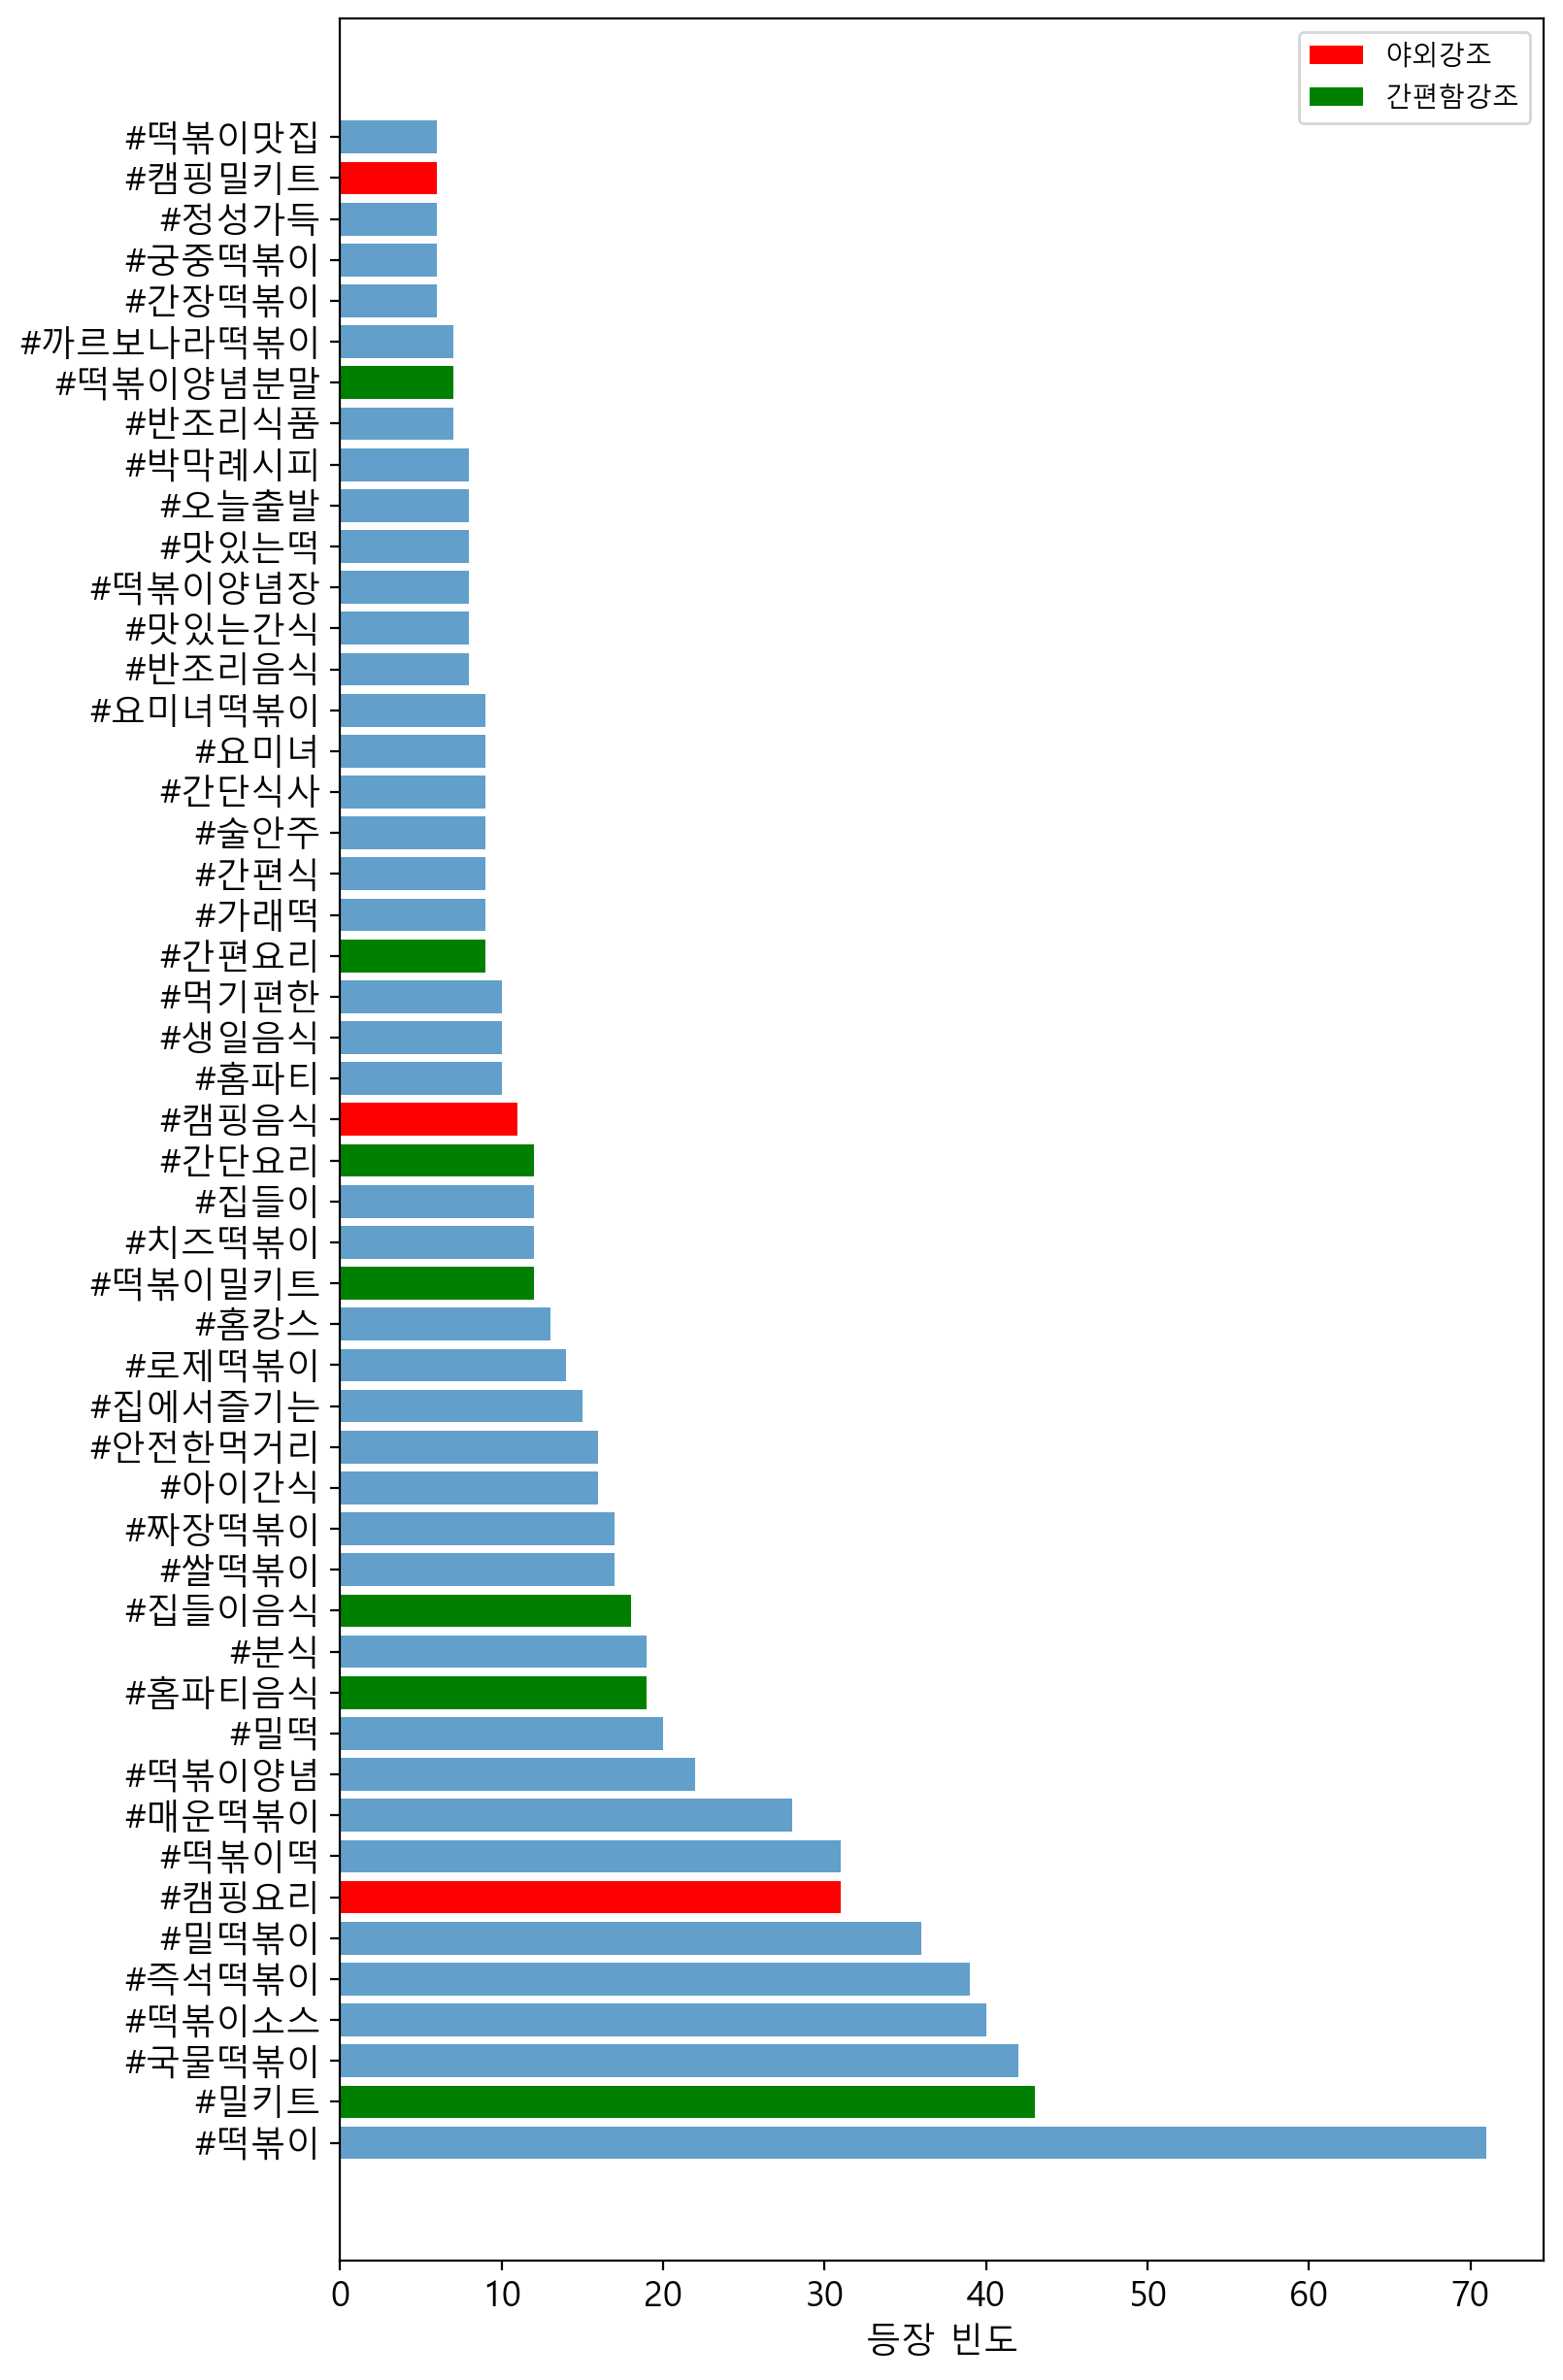

In [9]:
df_outdoor = df_tag_count.iloc[[6, 25, 48]]

df_indoor = df_tag_count.iloc[[1, 11, 13, 21, 24, 29, 43]]

plt.figure(figsize=(8, 15))
plt.barh(df_tag_count['해시태그'][:50], df_tag_count['빈도'][:50], alpha=0.7)
plt.barh(df_outdoor['해시태그'], df_outdoor['빈도'], color='r', label='야외강조')
plt.barh(df_indoor['해시태그'], df_indoor['빈도'], color='g', label='간편함강조')

plt.legend(loc='upper right')
plt.yticks(size=13)
plt.xticks(size=13)
plt.xlabel('등장 빈도', size=13)

## 3.2.4 데이터 불러오기 : 떡볶이 제품 리뷰 데이터

In [10]:
filepath = './data'
df = pd.read_excel(filepath+"/떡볶이_리뷰데이터.xlsx")
print(df.shape)
df.head(3)

(59055, 6)


,name,int_likes,int_photo,int_review,reviews,price
0,제품100,12550,489,1262,"곱창전골맛이 많이 날줄 알았는데, 먹어보니 떡뽁이맛에 곱창이 들어가 있지만, 잘 어...",11900
1,제품100,12550,489,1262,타임세일해서 2개 구매했어요. 냉동 안되서 아쉽게 2개만ㅜㅜ 곱창도 좋아하고 떡볶이...,11900
2,제품100,12550,489,1262,포장 깔끔하게 배송되었어요~~~\n간편하게 맛있게 잘 먹었어요\n소스를 다 넣었더...,11900


## 3.2.5. 데이터 전처리: 정규 표현식

In [11]:
df_1 = df.copy()
df_1.isnull().sum()

name          0
int_likes     0
int_photo     0
int_review    0
reviews       0
price         0
dtype: int64

In [12]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59055 entries, 0 to 59054
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        59055 non-null  object
 1   int_likes   59055 non-null  int64 
 2   int_photo   59055 non-null  int64 
 3   int_review  59055 non-null  int64 
 4   reviews     59055 non-null  object
 5   price       59055 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 2.7+ MB


In [13]:
df_1.drop_duplicates(subset='reviews', inplace=True)
df_1['reviews_kor'] = df_1['reviews'].apply(lambda x:" ".join(re.compile("[가-힣]+").findall(x)))

## 3.2.6 데이터 전처리: 형태소 분석

In [22]:
from kiwipiepy import Kiwi

kiwi = Kiwi()
def find_nouns_verb_adject(text):
    """입력된 문장에서 명사, 동사 추출해 리스트로 반환"""
    tokens = kiwi.tokenize(text)

    target_idxs = []
    target_words = []
    for idx, wrd in enumerate(tokens):
        if 'NN' in wrd.tag:
            if len(wrd.form) > 1:
                target_words.append(wrd.form)
                target_idxs.append('noun')
        elif wrd.tag.startswith("V"):
            tmp_form = wrd.form + "다" 
            target_words.append(tmp_form)
            target_idxs.append('verb')
    return target_words, target_idxs

def find_intension_one_text(words, words_tag):
    """문장 내 의도를 나타내는 단어를 추출한다"""
    intensions = []
    for idx, tag in enumerate(words_tag):
        try:
            if tag == 'verb':
                word = "".join(word[idx-1:idx+1])
                intensions.append(word)
            elif(tag=='noun') and (words_tag[idx+1]!='verb'):
                intensions.append(words[idx])
        except:
            intensions.append(words[idx])
    return intensions

def find_intension(text):
    """입력된 문장에서 의도를 찾아서 반환한다"""
    target_words, target_idxs = find_nouns_verb_adject(text)
    intensions = find_intension_one_text(target_words, target_idxs)
    return intensions

In [23]:
find_intension(text="세일할 때 원플러스원으로 샀어요. 간편하게 맛있게 잘 먹었어요")

['세일', '사다', '간편하다', '맛있다', '먹다']

In [24]:
df_1['주요표현'] = df_1['reviews_kor'].apply(lambda x:find_intension(x))
df_1.head(3)

,name,int_likes,int_photo,int_review,reviews,price,reviews_kor,주요표현
0,제품100,12550,489,1262,"곱창전골맛이 많이 날줄 알았는데, 먹어보니 떡뽁이맛에 곱창이 들어가 있지만, 잘 어...",11900,곱창전골맛이 많이 날줄 알았는데 먹어보니 떡뽁이맛에 곱창이 들어가 있지만 잘 어울리...,"[곱창, 나다, 알다, 먹다, 보다, 들어가다, 있다, 어울리다, 맛있다, 나다, ..."
1,제품100,12550,489,1262,타임세일해서 2개 구매했어요. 냉동 안되서 아쉽게 2개만ㅜㅜ 곱창도 좋아하고 떡볶이...,11900,타임세일해서 개 구매했어요 냉동 안되서 아쉽게 개만 곱창도 좋아하고 떡볶이도 무지 ...,"[타임, 세일, 구매, 되다, 아쉽다, 좋아하다, 좋아하다, 배송, 월요, 출발, ..."
2,제품100,12550,489,1262,포장 깔끔하게 배송되었어요~~~\n간편하게 맛있게 잘 먹었어요\n소스를 다 넣었더...,11900,포장 깔끔하게 배송되었어요 간편하게 맛있게 잘 먹었어요 소스를 다 넣었더니 제 입맛...,"[포장, 간편하다, 맛있다, 먹다, 넣다, 짜다, 넣다, 말다, 가다, 보다, 넣다]"


## 3.2.7 데이터 분석: 다빈도 표현 분석

In [25]:
keywords = sum(df_1['주요표현'].tolist(), [])
keywords = [key for key in keywords if len(key)>1]

keywords_count = Counter(keywords).most_common()

keys = []
counts = []
for i in range(len(keywords_count)):
    keys.append(keywords_count[i][0])
    counts.append(keywords_count[i][1])

df_key_count = pd.DataFrame({"keyword" : keys, "count":counts})
df_key_count.sample(3)

,keyword,count
5356,브주듀소혀래아구니주가미,1
4495,이래,1
4890,수작업,1


In [26]:
def find_nouns(keyword):
    """명사 태그 반환"""
    tokens = kiwi.tokenize(keyword)
    for token in tokens:
        if 'NN' in token.tag:
            return 'Noun'
        else:
            break
    return 'ETC'
df_key_count['tag'] = df_key_count['keyword'].apply(lambda x:find_nouns(x))
df_key_count

,keyword,count,tag
0,먹다,31168,ETC
1,맛있다,30166,ETC
2,이다,18769,ETC
3,좋다,16390,ETC
4,하다,10655,ETC
...,...,...,...
6134,마약빼미,1,Noun
6135,쩌네요,1,ETC
6136,나이,1,Noun
6137,파세요오,1,Noun


In [27]:
df_key_count_nouns = df_key_count[(df_key_count['tag']=='Noun')&(df_key_count['count']>5)]
df_key_count_nouns

,keyword,count,tag
9,구매,3814,Noun
10,떡볶이,3760,Noun
17,주문,2982,Noun
24,배송,1964,Noun
29,만족,1586,Noun
...,...,...,...
1450,제시간,6,Noun
1451,주먹밥,6,Noun
1452,대세,6,Noun
1453,사건,6,Noun


In [28]:
df_key_count_nouns.to_excel('명사갯수데이터_떡볶이.xlsx')